<a href="https://colab.research.google.com/github/ethanmacrae/classification-predict-streamlit-template/blob/master/Classification%20Predict%20Notebook%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                  CLIMATE CHANGE BELIEF ANALYSIS

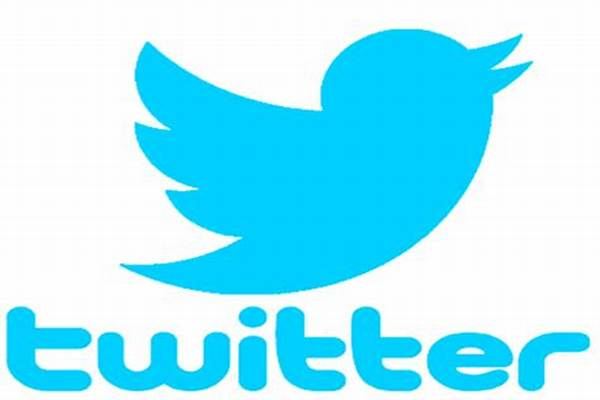

 <a id="one"></a>
### Comet Experiement
Comet will be used for version control

In [1]:
# import comet_ml at the top of your file
import comet_ml
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="uIA4LnUcw5MgXtaoZFKhjA8kp",
    project_name="team-14-classification",
    workspace="bravo",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/bravo/team-14-classification/95cb150bb8a946a8b03bcf6f54348d2e



Team 14:
1. Mmathabo Pule
2. Zanele Lushaba
3. Sebaka Mogano
4. Ethan Macrae

# Introduction

In recent years many companies have adopted the use of social media platforms and social media data as an alternative way to engage with customers for a fast and effective response to improve customer experience,  build brand awareness and increase customer base through targeted advertisement.The data generated within social media is classified as unstructured data, the sentiments from this data are analysed using Natural Langauge Processing which refers to a process of analysing text to determine the author's emotion or attitude toward a topic. Sentiments analysis assist companies to gain better insight into the author's attitude towards their brands, products, and services.


### Problem Statement
Many businesses have made significant commitments to demonstrate that acting on climate change is good for the earth and
is also a smart business strategy. There has been a growing demand for companies to analyse social media data with the intention of gauging how their product/service may be received by consumers. This will aslo assist companies access a broad base of consumer sentiment, spanning multiple demographic and geographic categories for better informative future marketing strategies.


### Objectives of the Research
The key objectives of this research project are as follow:

- Perform data analysis to investigate if there are any errors and unnecessary data 
- Perform data cleaning to remove unnecessary data and errors
- Perform EDA to gain better insight of the data
- Create engineering features to improve the performance of the model
- Build a model that is capable of classifying whether or not a person believes in climate change based on the tweet data 
- Evaluate the accuracy of the best machine learning model
 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Data Preprocessing</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Conclusion</a>

<a href=#eight>8. References</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>


In [4]:
# Data manipulation
import re
import nltk
import datetime
import pandas as pd
import numpy as np
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk import word_tokenize, pos_tag, pos_tag_sents
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from collections import Counter
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_classification
#from imblearn.over_sampling import SMOTE


# Libraries for data preparation and model building
import pickle
#from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from sklearn import metrics
from sklearn.svm import SVC
from sklearn import svm
svc = svm.SVC()
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from scipy.stats import boxcox, zscore
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
from sklearn.linear_model import SGDClassifier 
from sklearn.model_selection import GridSearchCV

# Visualizations
#import plotly.express as px
#import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import string

# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

[nltk_data] Downloading package wordnet to /home/mmathabo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mmathabo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mmathabo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/mmathabo/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [5]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test_with_no_labels.csv')

### Data size and Structure

An important step before we attempt any analysis is to view the basic structure of our data so we may become more familiar with it. Thus, we employ some basic methods such as calling .info() and .shape on the data, as well as viewing the first few entries with .head().

In [6]:
#view train dataset
display(df_train.head())

#looking at the information of the train dataset
df_train.info()

#looking at the shape of the train dataset
df_train.shape


,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


(15819, 3)

- The dataset has 15819 entries and 3 variables that do not have null values. There are two interger variables and one object variable.

In [7]:
#view test dataset
display(df_test.head())

#looking at the information of the test dataset
df_test.info()

#looking at the shape of the test dataset
df_test.shape



,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


(10546, 2)


- The dataset has 10546 entries and 2 variables that do not have null values. There is one interger variables and one object variable.

### Overview of the datasets

Each tweet is labelled as one of the following classes:

- [2]  News: the tweet links to factual news about climate change
- [1]  Pro: the tweet supports the belief of man-made climate change
- [0]  Neutral: the tweet neither supports nor refutes the belief of man-made climate change
- [-1] Anti: the tweet does not believe in man-made climate change



<a id="three"></a>
## 3. Data Preprocessing
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    

---


In [51]:
rename_labels = {
    -1: "negative",
     0: "Neutral",
     1: "Positive",
     2: "News",
}
df_train["sentiment"] = df_train["sentiment"].apply(lambda x: rename_labels[x])
df_train.head()

,sentiment,message,tweetid
0,Positive,PolySciMajor EPA chief doesn't think carbon di...,625221
1,Positive,It's not like we lack evidence of anthropogeni...,126103
2,News,RT @RawStory: Researchers say we have three ye...,698562
3,Positive,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,Positive,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [11]:
def hashtag_extract(x):
    
    '''
    This function takes in dataframe x and finds words attached to hashtags, extracting them to a list.
    
    Parameters:
        x (pandas dataframe): A dataframe containing strings
                    

    Returns:
        hashtags (list): list of hashtags found in dataframe x

    '''
    
    
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [12]:
# extracting hashtags
news = hashtag_extract(df_train['message'][df_train['sentiment'] == 2])
pro = hashtag_extract(df_train['message'][df_train['sentiment'] == 1])
neutral = hashtag_extract(df_train['message'][df_train['sentiment'] == 0])
anti = hashtag_extract(df_train['message'][df_train['sentiment'] == -1])

In [13]:
pro = sum(pro,[])
anti = sum(anti,[])
neutral = sum(neutral,[])
news = sum(news,[])

### Tweets Cleaning

To remove the noise caused by connectors or otherwise called Stop words remove special characters, spaces or Tabs emojies,urls,hashtags.

In [14]:
def processing(tweet):
    
    '''
    This function takes in a string and cleans the string of urls, punctuation, whitespace, etc.
    
    Parameters:
        tweet (str): tweet in the form of a string
                    

    Returns:
        tweet (str): cleaned version of input tweet

    '''
    
    tweet = tweet.lower()
    tweet = re.sub(r'http[s]?:\/\/\S+', '', tweet) # Remove url's
    tweet = re.sub(r'@[A-Za-z0-9]+','',tweet)  # Remove @mentions 
    tweet = re.sub(r'#\w*', '', tweet)  # Remove hashtags    
    tweet = re.sub(r'\d+', '', tweet)  # Remove numbers  
    tweet = re.sub(r"[_,-.;':#?!\&/$]+\ *", ' ', tweet)  # Remove punctuation
    tweet = re.sub(r"U+FFFD ", ' ', tweet)     # Remove that funny diamond
    tweet = re.sub(r'\s\s+', ' ', tweet) # Remove extra whitespace
    tweet = re.sub(r'rt[\s]+', '', tweet)
    tweet = tweet.lstrip(' ') # Remove space in front of tweet
    
    
    return tweet


In [15]:
display(df_train.head())
display(df_test.head())

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [16]:
#checking duplicates
msg= df_train['message']
df_train[msg.isin(msg[msg.duplicated()])]

,sentiment,message,tweetid
10,1,RT @StephenSchlegel: she's thinking about how ...,295793
17,1,RT @patagonia: If our elected leaders fail to ...,490604
18,1,RT @SenSanders: We have a president-elect who ...,228658
21,1,RT @World_Wildlife: How climate change impacts...,690605
35,1,RT @BernieSanders: #ImVotingBecause the future...,817108
...,...,...,...
15781,1,RT @StephenSchlegel: she's thinking about how ...,869993
15799,1,RT @SethMacFarlane: HRC proposes installing ha...,52528
15801,1,RT @SenSanders: On virtually every major issue...,331127
15811,1,RT @StephenSchlegel: she's thinking about how ...,426353


In [17]:
#removing duplicates
df_train.drop_duplicates(subset = "message",keep = False,inplace = True)
df_train

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
...,...,...,...
15813,1,RT @thinkprogress: EPA head falsely claims car...,442853
15814,1,RT @ezlusztig: They took down the material on ...,22001
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732


In [21]:
         '''
         This function takes in a string and cleans the string of stopwords
    
         Parameters:
         tweet (str): tweet in the form of a string
                    

         Returns:
         tweet (str): input tweet less stopwords

         '''
def stopword(tweet):
    
        
    
    sw = [i for i in string.split() 
      if i not in stopwords.words('english')]
    return ''.join(sw)

# Lemmatisation

Lemmatization is the grouping together of different forms of the same word. In search queries, lemmatization allows end users to query any version of a base word and get relevant results. Because search engine algorithms use lemmatization, the user is free to query any inflectional form of a word and get relevant results

In [22]:
#Stemming and Lemma
lemma = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [23]:
display(df_train.head())
display(df_test.head())

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [61]:
    '''
    This function takes in a string and lemmatizes the string, which is to
    return the base or dictionary form of a word, which is known as the lemma.
    
    Parameters:
        tweet (str): tweet in the form of a string
                    

    Returns:
        tweet (str): tweet with words converted into their base lemma. 

    '''

def lemmatize(string):
    #from sklearn import preprocessing
    word_pos_tag = nltk.pos_tag(word_tokenize(string))
    x = [lemma.lemmatize(tag[0],get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tag)]
    return " ".join(x)        

IndentationError: expected an indented block (<ipython-input-61-39b66b0e316a>, line 16)

In [34]:
# def finalprocess(string):
#     return lemmatize(stopword(processing(string)))

# df_train['clean message'] = df_train['message'].apply(lambda x: finalprocess(x))
# df_train.head()

<a id="four"></a>
## 4. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    |

---

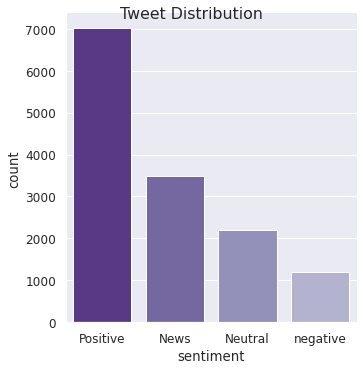

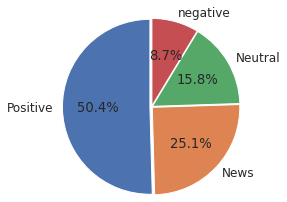

In [52]:

sns.set(font_scale=1.1)
ax1 = sns.catplot("sentiment", data=df_train, kind="count", palette = sns.color_palette('Purples_r'))
ax1.fig.suptitle('Tweet Distribution')
plt.show()
#plotting pie chart
values = df_train["sentiment"].value_counts()/df_train.shape[0]
labels = (df_train['sentiment'].value_counts()/df_train.shape[0]).index
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, explode=(0.04,0.02,0.02,0.02), radius=2)
plt.tight_layout()
plt.show()

On the above two graphs it shows that 50.4% of tweets are reacting positively towards the climate change, and we have the least percentage that are against climate change.

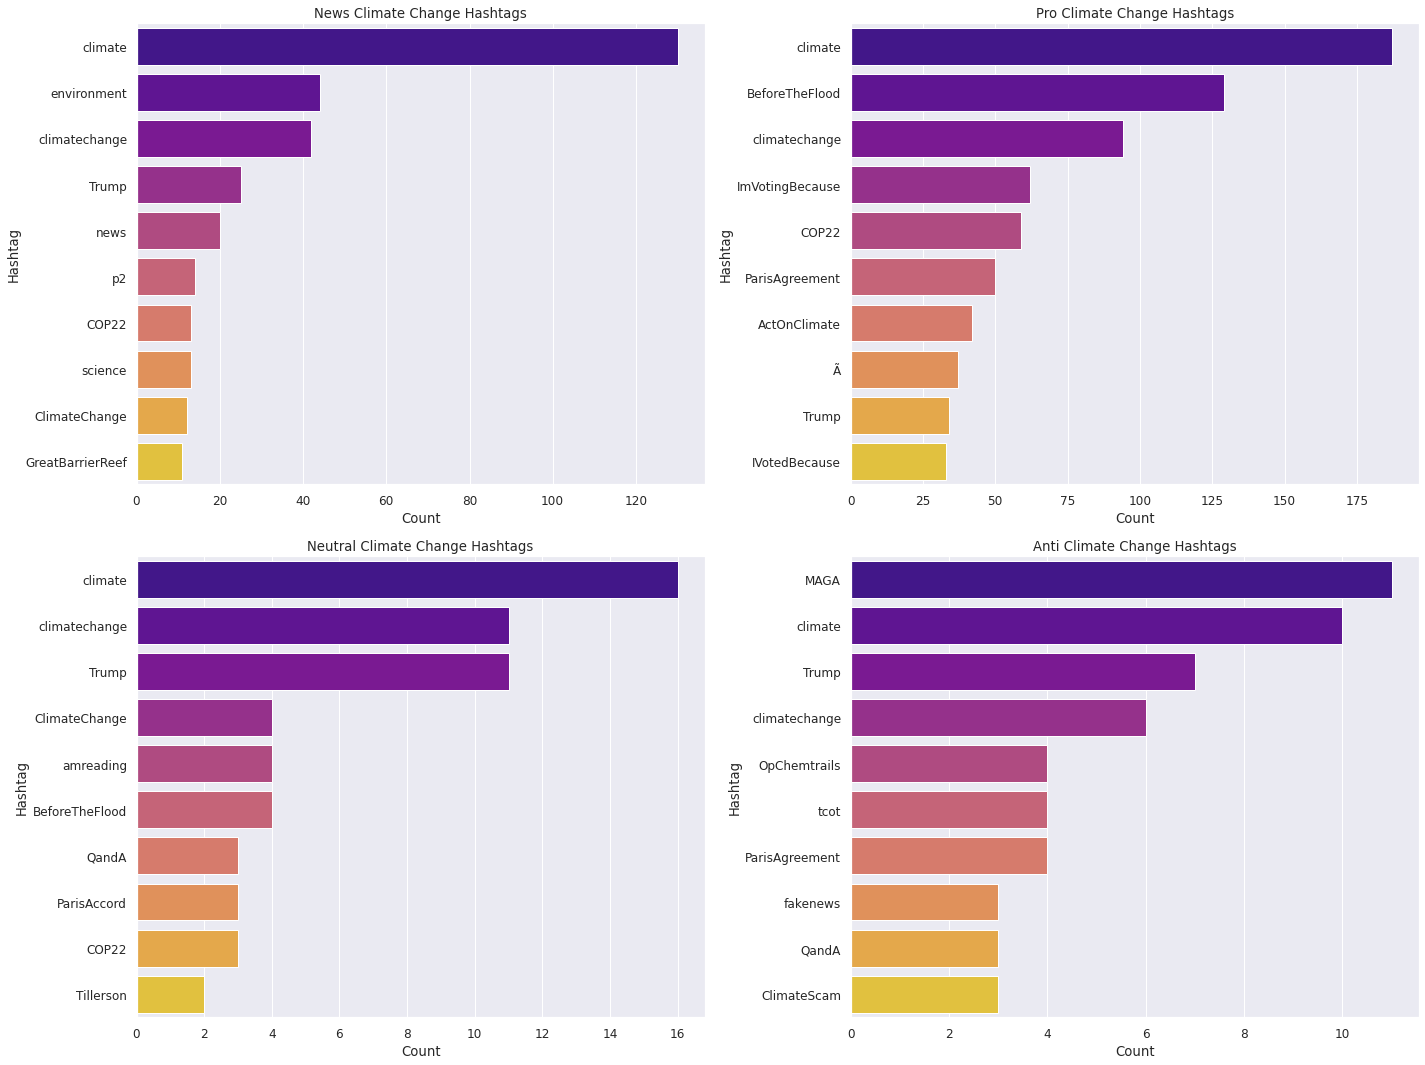

In [60]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(20,15))

frequency = nltk.FreqDist(news)
hashtag_count = pd.DataFrame({'Hashtag': list(frequency.keys()),
                  'Count': list(frequency.values())})
hashtag_count = hashtag_count.nlargest(columns="Count", n = 10) # selecting top 10 most frequent hashtags
ax1 = sns.barplot(data=hashtag_count, y= 'Hashtag', x = 'Count', palette = 'plasma',ax = axes[0,0])
ax1.set(ylabel = 'Hashtag', title = 'News Climate Change Hashtags')


frequency = nltk.FreqDist(pro)
hashtag_count = pd.DataFrame({'Hashtag': list(frequency.keys()),
                  'Count': list(frequency.values())})
hashtag_count = hashtag_count.nlargest(columns="Count", n = 10) # selecting top 10 most frequent hashtags
ax2 = sns.barplot(data=hashtag_count, y= "Hashtag", x = "Count", palette = 'plasma',ax = axes[0,1])
ax2.set(title = 'Pro Climate Change Hashtags')


frequency = nltk.FreqDist(neutral)
hashtag_count = pd.DataFrame({'Hashtag': list(frequency.keys()),
                  'Count': list(frequency.values())})
hashtag_count = hashtag_count.nlargest(columns="Count", n = 10) # selecting top 10 most frequent hashtags
ax1 = sns.barplot(data=hashtag_count, y= "Hashtag", x = "Count", palette = 'plasma',ax = axes[1, 0])
ax1.set(ylabel = 'Hashtag', title = 'Neutral Climate Change Hashtags')


frequency = nltk.FreqDist(anti)
hashtag_count = pd.DataFrame({'Hashtag': list(frequency.keys()),
                  'Count': list(frequency.values())})
hashtag_count = hashtag_count.nlargest(columns="Count", n = 10) # selecting top 10 most frequent hashtags
ax2 = sns.barplot(data=hashtag_count, y= "Hashtag", x = "Count", palette = 'plasma',ax = axes[1,1])
ax2.set(title = 'Anti Climate Change Hashtags')
plt.tight_layout()

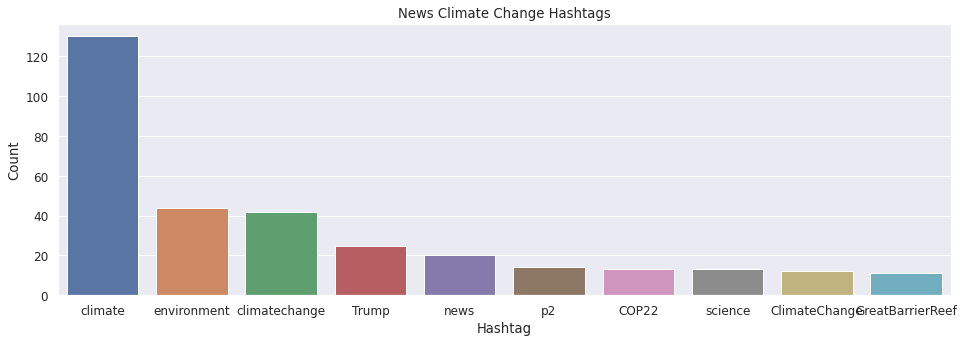

In [53]:
frequency = nltk.FreqDist(news)
hashtag_count = pd.DataFrame({'Hashtag': list(frequency.keys()),
                  'Count': list(frequency.values())})
hashtag_count = hashtag_count.nlargest(columns="Count", n = 10) # selecting top 10 most frequent hashtags
plt.figure(figsize=(16,5))
ax = sns.barplot(data=hashtag_count, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count', title = 'News Climate Change Hashtags')
plt.show()

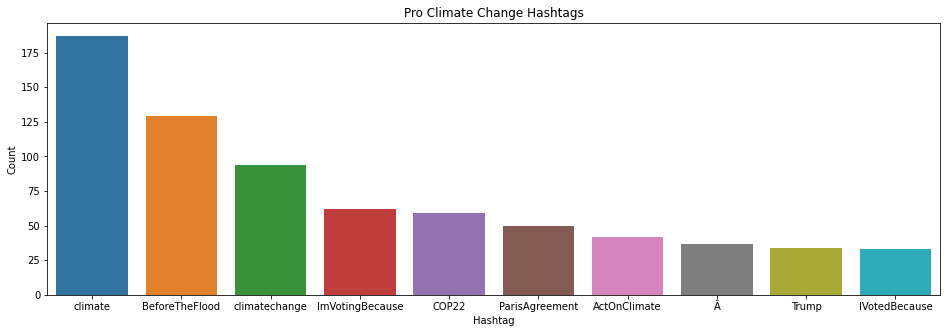

In [42]:
frequency = nltk.FreqDist(pro)
hashtag_count = pd.DataFrame({'Hashtag': list(frequency.keys()),
                  'Count': list(frequency.values())})
hashtag_count = hashtag_count.nlargest(columns="Count", n = 10) # selecting top 10 most frequent hashtags
plt.figure(figsize=(16,5))
ax = sns.barplot(data=hashtag_count, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count', title = 'Pro Climate Change Hashtags')
plt.show()

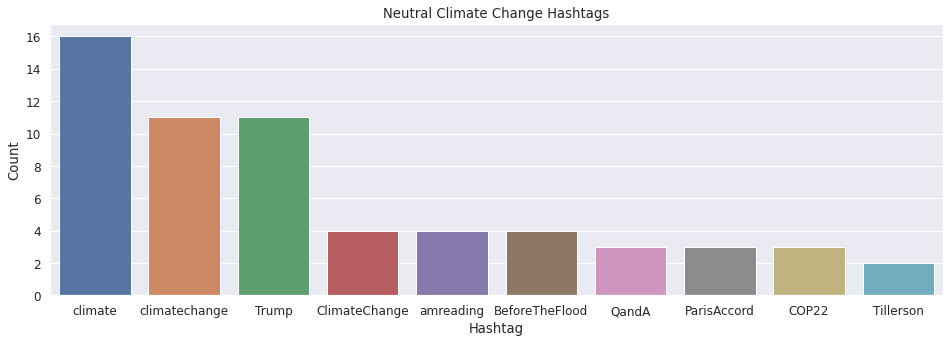

In [54]:
frequency = nltk.FreqDist(neutral)
hashtag_count = pd.DataFrame({'Hashtag': list(frequency.keys()),
                  'Count': list(frequency.values())})
hashtag_count = hashtag_count.nlargest(columns="Count", n = 10) # selecting top 10 most frequent hashtags
plt.figure(figsize=(16,5))
ax = sns.barplot(data=hashtag_count, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count', title = 'Neutral Climate Change Hashtags')
plt.show()

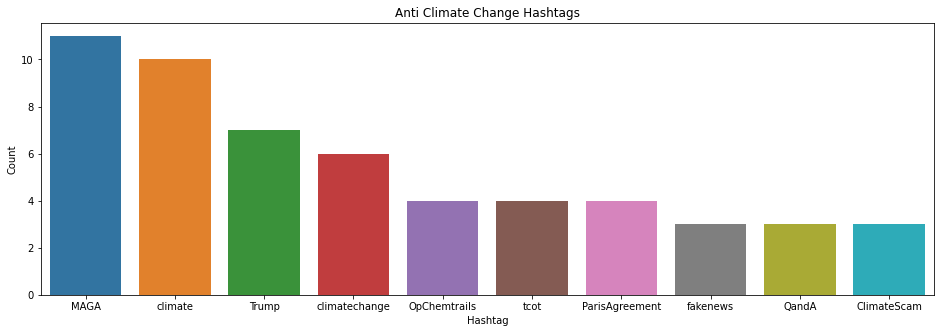

In [44]:
frequency = nltk.FreqDist(anti)
hashtag_count = pd.DataFrame({'Hashtag': list(frequency.keys()),
                  'Count': list(frequency.values())})
hashtag_count = hashtag_count.nlargest(columns="Count", n = 10) # selecting top 10 most frequent hashtags
plt.figure(figsize=(16,5))
ax = sns.barplot(data=hashtag_count, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count', title = 'Anti Climate Change Hashtags')
plt.show()

In [57]:
news_words =' '.join([text for text in df_train['new_message'][df_train['sentiment'] == 2]])

news_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color= 'white').generate(news_words)
plt.figure(figsize=(10, 7))
plt.imshow(news_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

KeyError: 'new_message'

In [58]:
pro_words =' '.join([text for text in df_train['new_message'][df_train['sentiment'] == 1]])

pro_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color= 'white').generate(pro_words)
plt.figure(figsize=(10, 7))
plt.imshow(pro_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

KeyError: 'new_message'

In [47]:
neutral_words =' '.join([text for text in df_train['new_message'][df_train['sentiment'] == 0]])

neutral_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color= 'white').generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(neutral_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

KeyError: 'new_message'

In [48]:
anti_words =' '.join([text for text in df_train['new_message'][df_train['sentiment'] == -1]])

anti_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color= 'white').generate(anti_words)
plt.figure(figsize=(10, 7))
plt.imshow(anti_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

KeyError: 'new_message'

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
To ensure we are getting the best possible predictions we will be using four classification models to compare the results. The overall idea of classification is to basically categorizes a set of data into classes.The process involves predicting the class of given data points,these Classes are sometimes called as targets/ labels or categories,A common job of Classification  algorithms is to recognize objects and being able to separate them into categories.
  Description of models: 
  
1. Support vector machine

2. Stochastic Gradient Descent:

3. Random Forest

4. Decision tree

---

### Feature engineering
Predictor vs Target Variables

In [73]:
X =  df_train["message"]
y = df_train['sentiment']

Splitting the dataset into the training set and test set

In [57]:
#Creating the Test Train split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [58]:
tfidf=TfidfVectorizer(max_features= 10546 ,ngram_range=(1, 2 ))

In [81]:
tf_X_train=tfidf.fit_transform(X_train)
tf_X_test=tfidf.transform(X_test)


In [82]:
cv = CountVectorizer(ngram_range=(1,3), max_df = 0.9, min_df = 3)

In [84]:
cv_X_train = cv.fit_transform(X_train)
cv_X_test = cv.transform(X_test)

###  Model building
We decided to use a few different types of models for our data set and would be judging       :
 
- LinearSVC - Linear Support Vector Classification model 
- Sgd - Stochastic Gradient Descent  model 
- Random Forest - Regression model using random forking variables
- Decision Tree - Regression model using forking variables

### Training and Fitting the data 

   ### LinearSVC - Linear Support Vector Classification model
is a supervised machine learning algorithm that can be used for both classification or regression challenges. However, it is mostly used in classification problems.

In [85]:
#Creating the Support vector Machine Classification Model
sclf = svm.SVC(kernel='linear', C = 1.0,gamma='scale',shrinking=True)
#clf=LinearSVC()
sclf.fit(tf_X_train,y_train)



SVC(kernel='linear')

### Stochastic Gradient Descent

is a simple yet very efficient approach to fitting linear classifiers and regressors    under convex loss functions such as (linear) Support Vector Machines and Logistic Regression.

In [86]:
#Creating the SGC Model
sgc = SGDClassifier(loss='log', penalty='l2',alpha=8e-05, random_state=42, max_iter=2000, tol=None, n_jobs = 6)
sgc.fit(cv_X_train, y_train)

SGDClassifier(alpha=8e-05, loss='log', max_iter=2000, n_jobs=6, random_state=42,
              tol=None)

### Random Forest Classifier
A Random Forest is an ensemble technique capable of performing both regression and classification tasks  with the use of multiple decision trees and a technique called Bootstrap and Aggregation, commonly known as bagging. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.

In [87]:
#Creating the Random Forest Classification Model

classifier = RandomForestClassifier()
classifier.fit(tf_X_train, y_train)

RandomForestClassifier()

### Decision tree Classifier
 builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes|

In [88]:
#Creating the Decision Tree Classification Model
dclf = DecisionTreeClassifier()
dclf = dclf.fit(tf_X_train,y_train)

### Creating Predictions

in this section we are creating predictions of the models we decided to use

In [89]:
# get predictions for testing data
Random_pred=classifier .predict(tf_X_test)
Svm_pred = sclf .predict(tf_X_test)
Decision_pred=dclf .predict(tf_X_test)
Sgc_pred=sgc.predict(cv_X_test)





<a id="six"></a>
## 6. Model Perfomance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

Training the models and calclating the precision  recall  f1-score  support ,accuracy and Comfusion matrix

In [93]:
#Random Forest Results
print(classification_report(y_test,Random_pred))

#y_predicted = Random_pred.predict(X_test)
experiment.log_confusion_matrix(y_test, Random_pred)

              precision    recall  f1-score   support

          -1       0.86      0.18      0.29       279
           0       0.69      0.39      0.50       464
           1       0.70      0.90      0.79      1691
           2       0.77      0.71      0.74       730

    accuracy                           0.72      3164
   macro avg       0.76      0.54      0.58      3164
weighted avg       0.73      0.72      0.69      3164



NameError: name 'experiment' is not defined

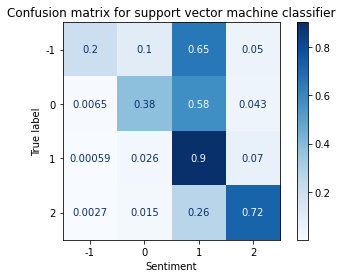

In [31]:

matrix = plot_confusion_matrix(classifier, tf_X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for Random Forest classifier')
plt.xlabel("Sentiment")
plt.show(matrix)
plt.show()

In [112]:
#support vector machine Results
print(classification_report(y_test,Svm_pred))
#y_predicted = model.predict(X_test)
Experiment.log_confusion_matrix(y_test, Svm_pred)

COMET ERROR: Error creating confusion matrix: 'Series' object has no attribute 'create_confusion_matrix'; ignoring


              precision    recall  f1-score   support

          -1       0.78      0.42      0.54       279
           0       0.70      0.46      0.55       464
           1       0.77      0.90      0.83      1691
           2       0.79      0.78      0.79       730

    accuracy                           0.77      3164
   macro avg       0.76      0.64      0.68      3164
weighted avg       0.76      0.77      0.75      3164



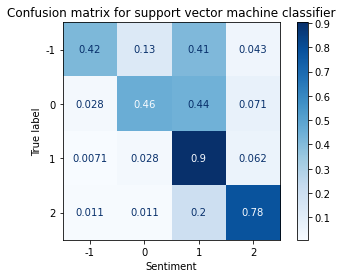

In [16]:
matrix = plot_confusion_matrix(sclf, tf_X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for support vector machine classifier')
plt.xlabel("Sentiment")
plt.show(matrix)
plt.show()

In [51]:
#Decision tree Results
print(classification_report(y_test,Decision_pred))
y_predicted = model.predict(X_test)
Experiment.log_confusion_matrix(y_test, Decision_pred)

              precision    recall  f1-score   support

          -1       0.45      0.34      0.39       279
           0       0.43      0.45      0.44       464
           1       0.71      0.73      0.72      1691
           2       0.63      0.64      0.63       730

    accuracy                           0.63      3164
   macro avg       0.56      0.54      0.55      3164
weighted avg       0.63      0.63      0.63      3164



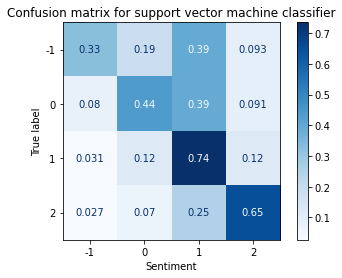

In [32]:
matrix = plot_confusion_matrix(dclf, tf_X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for Decision tree  classifier')
plt.xlabel("Sentiment")
plt.show(matrix)
plt.show()

In [17]:
#Sgc Results
print(classification_report(y_test,Sgc_pred))
y_predicted = model.predict(X_test)
Experiment.log_confusion_matrix(y_test, Sgc_pred)

              precision    recall  f1-score   support

          -1       0.83      0.25      0.39       279
           0       0.72      0.36      0.48       464
           1       0.73      0.92      0.81      1691
           2       0.79      0.76      0.78       730

    accuracy                           0.74      3164
   macro avg       0.77      0.58      0.62      3164
weighted avg       0.75      0.74      0.72      3164



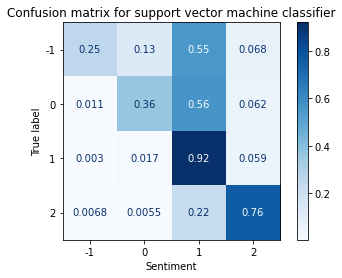

In [30]:
matrix = plot_confusion_matrix(sgc, tf_X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for Stochastic Gradient Descent classifier')
plt.xlabel("Sentiment")
plt.show(matrix)
plt.show()

### Final Model  and Submission

In [ ]:
y_test = df_test['message']

In [ ]:
test_final = tfidf.transform(y_test)

In [ ]:
predictions = clf.predict(test_final)

In [ ]:
submission = pd.DataFrame({'tweetid': test_df.tweetid, 'sentiment': predictions})
submission.to_csv('sebaka_submission.csv', index=False)

<a id="seven"></a>
## 7. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

<a id="eight"></a>
## 8. References
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

# Comet

In [62]:
# log hash of your dataset to Comet.ml
experiment.log_dataset_hash(df_train)
experiment.end

<bound method BaseExperiment.end of <comet_ml.Experiment object at 0x7f5e68413dc0>>